# Configuración Experimental

## 1. Configuración del Entorno

Estructura del Taller
Introducción a la Configuración Experimental

1. Preparación de Datos y Preprocesamiento
2. Diseño de Experimentos
3. Evaluación y Validación de Modelos
4. Optimización de Hiperparámetros

## 2. Introducción a la Configuración Experimental
**Objetivo**: Familiarizar a los participantes con los conceptos básicos de la configuración experimental en ML y IA.

**Contenido**:

**Presentación**: Breve introducción a la importancia de la configuración experimental en ML y IA.

  **Conceptos Clave:**



*   Variables Independientes y Dependientes
*   Hiperparámetros vs. Parámetros
*   Overfitting y Underfitting
*   Validación Cruzada

**Herramientas:** Introducción a Google Colab y sus funcionalidades básicas.

**Actividad Práctica:**

**Ejercicio 1:** Crear un cuaderno en Google Colab y cargar un dataset de ejemplo (por ejemplo, Iris dataset).

**Ejercicio 2:** Explorar el dataset utilizando pandas y matplotlib para visualizar las distribuciones de las características.

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
35,5.0,3.2,1.2,0.2,0
146,6.3,2.5,5.0,1.9,2
79,5.7,2.6,3.5,1.0,1
113,5.7,2.5,5.0,2.0,2
110,6.5,3.2,5.1,2.0,2


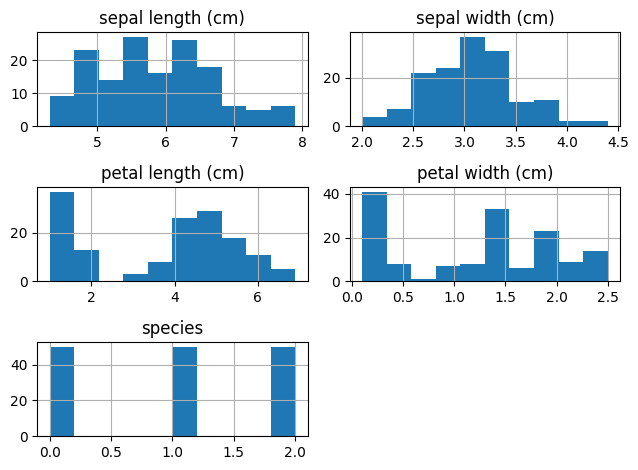

In [1]:
# Importar la librería pandas y asignarle el alias 'pd'
import pandas as pd

# Importar la librería matplotlib.pyplot y asignarle el alias 'plt'
import matplotlib.pyplot as plt

# Importar la función load_iris del módulo datasets de la librería sklearn
from sklearn.datasets import load_iris

# Cargar el dataset Iris utilizando la función load_iris()
# load_iris() devuelve un objeto que contiene los datos y metadatos del dataset
iris = load_iris()

# Crear un DataFrame de pandas a partir de los datos del dataset Iris
# iris.data contiene las características (features) del dataset
# iris.feature_names contiene los nombres de las columnas (nombres de las características)
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Añadir una nueva columna al DataFrame llamada 'species' que contiene las etiquetas de las especies
# iris.target contiene las etiquetas (labels) que indican la especie de cada flor
df['species'] = iris.target

# Generar histogramas para cada una de las columnas del DataFrame
# df.hist() crea un histograma para cada columna numérica en el DataFrame
df.hist()

# Ajustar automáticamente el espaciado entre los subgráficos para evitar superposiciones
plt.tight_layout()

df.sample(5)

# Mostrar los histogramas en una ventana gráfica
# plt.show() abre una ventana con los gráficos generados
#plt.show()

# df.sample(5) muestra 5 filas aleatorias del dataset
#df.sample(5)

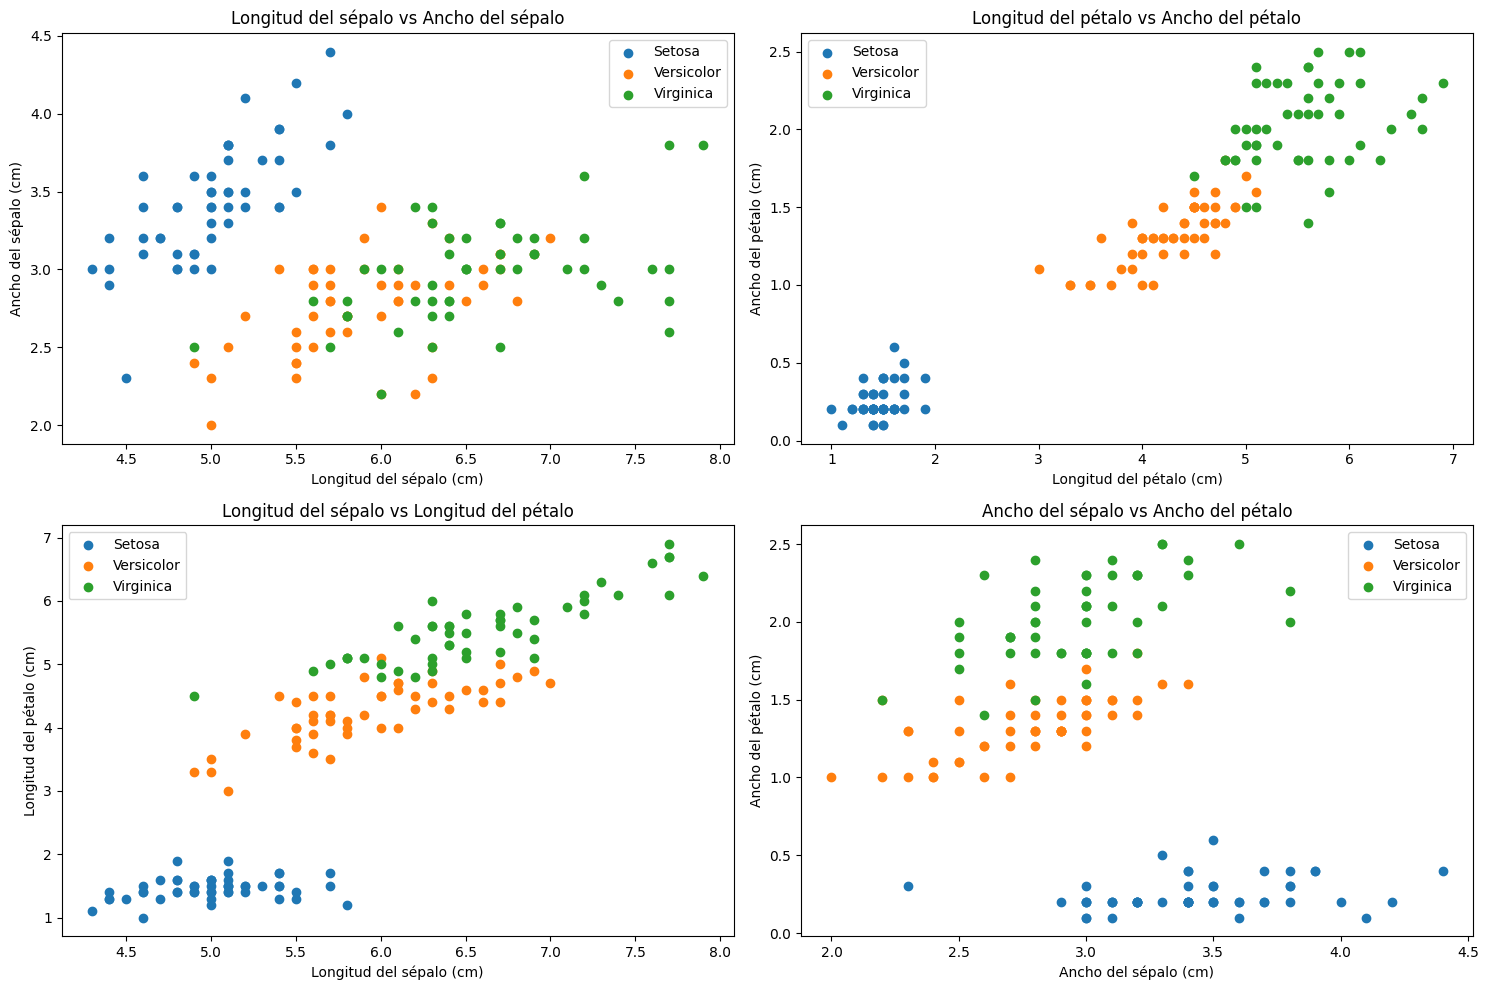

In [2]:
#Mapear los valores numéricos de las especies a sus nombres
species_names = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}
df['species_name'] = df['species'].map(species_names)

# Crear gráficos de dispersión para visualizar la separación de las clases
plt.figure(figsize=(15, 10))

# Gráfico 1: Longitud del sépalo vs Ancho del sépalo
plt.subplot(2, 2, 1)
for species, group in df.groupby('species_name'):
    plt.scatter(group['sepal length (cm)'], group['sepal width (cm)'], label=species)
plt.xlabel('Longitud del sépalo (cm)')
plt.ylabel('Ancho del sépalo (cm)')
plt.title('Longitud del sépalo vs Ancho del sépalo')
plt.legend()

# Gráfico 2: Longitud del pétalo vs Ancho del pétalo
plt.subplot(2, 2, 2)
for species, group in df.groupby('species_name'):
    plt.scatter(group['petal length (cm)'], group['petal width (cm)'], label=species)
plt.xlabel('Longitud del pétalo (cm)')
plt.ylabel('Ancho del pétalo (cm)')
plt.title('Longitud del pétalo vs Ancho del pétalo')
plt.legend()

# Gráfico 3: Longitud del sépalo vs Longitud del pétalo
plt.subplot(2, 2, 3)
for species, group in df.groupby('species_name'):
    plt.scatter(group['sepal length (cm)'], group['petal length (cm)'], label=species)
plt.xlabel('Longitud del sépalo (cm)')
plt.ylabel('Longitud del pétalo (cm)')
plt.title('Longitud del sépalo vs Longitud del pétalo')
plt.legend()

# Gráfico 4: Ancho del sépalo vs Ancho del pétalo
plt.subplot(2, 2, 4)
for species, group in df.groupby('species_name'):
    plt.scatter(group['sepal width (cm)'], group['petal width (cm)'], label=species)
plt.xlabel('Ancho del sépalo (cm)')
plt.ylabel('Ancho del pétalo (cm)')
plt.title('Ancho del sépalo vs Ancho del pétalo')
plt.legend()

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

## 3. Preparación de Datos y Preprocesamiento
**Objetivo**: Aprender a preparar y preprocesar datos para experimentos de ML.

**Contenido**:

**Limpieza de Datos:** Manejo de valores faltantes, eliminación de outliers.

**Transformación de Datos:** Normalización, estandarización, codificación de variables categóricas.

**División de Datos:** Train, Validation, Test sets.

**Actividad Práctica:**

**Ejercicio 3:** Limpiar y preprocesar el dataset Iris.

**Ejercicio 4:** Dividir el dataset en conjuntos de entrenamiento, validación y prueba.

In [3]:
# Importar la función train_test_split del módulo model_selection de scikit-learn
# train_test_split se utiliza para dividir un conjunto de datos en subconjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Importar la clase StandardScaler del módulo preprocessing de scikit-learn
# StandardScaler se utiliza para estandarizar características (escalar los datos para que tengan media 0 y desviación estándar 1)
from sklearn.preprocessing import StandardScaler

# Dividir los datos en características (X) y etiquetas (y)
# X contiene todas las columnas del DataFrame excepto 'species', que son las características (features)
X = df.drop(['species', 'species_name'], axis=1)

# y contiene solo la columna 'species', que es la etiqueta (target) que queremos predecir
y = df['species']

# Dividir los datos en conjuntos de entrenamiento y prueba
# train_test_split divide los datos en:
# - X_train: características del conjunto de entrenamiento
# - X_test: características del conjunto de prueba
# - y_train: etiquetas del conjunto de entrenamiento
# - y_test: etiquetas del conjunto de prueba
# test_size=0.2 indica que el 20% de los datos se utilizarán para prueba y el 80% para entrenamiento
# random_state=15 asegura que la división sea reproducible (siempre obtendrás la misma división)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

# Estandarizar los datos para que tengan media 0 y desviación estándar 1
# Crear una instancia de StandardScaler
scaler = StandardScaler()

# Ajustar el scaler a los datos de entrenamiento y transformarlos
# fit_transform calcula la media y la desviación estándar de X_train y luego escala los datos
X_train = scaler.fit_transform(X_train)

# Transformar los datos de prueba usando la misma media y desviación estándar calculada en X_train
# Esto asegura que los datos de entrenamiento y prueba se escalen de manera consistente
X_test = scaler.transform(X_test)

## 4. Diseño de Experimentos
**Objetivo**: Aprender a diseñar experimentos para evaluar diferentes configuraciones de modelos.

**Contenido**:

**Selección de Modelos:** Elección de algoritmos adecuados para el problema.


**Métricas de Evaluación:** Accuracy, Precision, Recall, F1-Score, etc.

**Actividad Práctica:**

**Ejercicio 5:** Implementar un modelo de clasificación como regresión logística.

**Ejercicio 6:** Evaluar el modelo utilizando métricas de validación.

Modelo de Regresión Logística entrenado correctamente.
Matriz de Confusión:
[[ 8  0  0]
 [ 0 13  0]
 [ 0  0  9]]

Precisión del modelo: 1.0

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



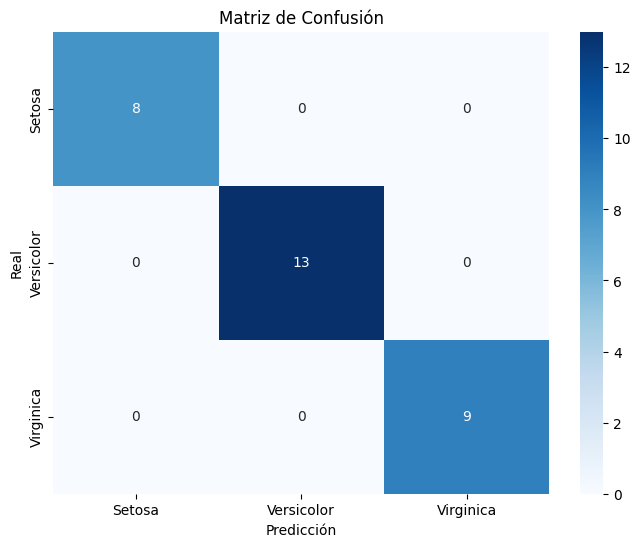

In [4]:
# Importar el modelo de Regresión Logística
from sklearn.linear_model import LogisticRegression

# Crear una instancia del modelo
model = LogisticRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Mostrar un mensaje de confirmación
print("Modelo de Regresión Logística entrenado correctamente.")

6#
# Realizar predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Importar métricas de evaluación
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns # para grafica de matriz de confusion

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(conf_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=species_names.values(),
            yticklabels=species_names.values())
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("\nPrecisión del modelo:", accuracy)

# Generar un reporte de clasificación
class_report = classification_report(y_test, y_pred)
print("\nReporte de Clasificación:")
print(class_report)

**Recursos Adicionales**
Documentación de Scikit-learn: https://scikit-learn.org/stable/

**Libro:** "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow" por Aurélien Géron